# Analysis of Advertisement Spend Vs Sales using Regression Techniques

This notebook analyzes a company's Sales. How the sales affected by advertisement using different medium like TV, Radio, Newspaper. The goal is to explore relationships between these features and sales, and to build regression models for predictive insights.

We will be using **Linear,Lasso,Ridge Regression Models** and also using **Polynomial degrees** with it. We will also perform **hyperparameter tuning** on the using GridSearchCV to optimize its performance and perform **5-fold cross validation**. The models will be evaluated and compared based on metrics like RMSE (Root Mean Squared Error) and R² score to identify the best model for predicting medical insurance charges.

### 1. Data Overview
- **Description**: This dataset explores the relationship between advertising expenditures across various channels (TV, radio, and newspaper) and sales performance. It provides insights into how different types of advertising spending impact product sales, allowing for data-driven analysis of marketing effectiveness.
- **Purpose**: To identify the factors influencing Sales and develop a best predictive model using different Regression models. We will also explore the impact of hyperparameter tuning on model performance.

### Dataset Link:
[Advertising Spend vs Sales Dataset on Kaggle](https://www.kaggle.com/datasets/brsahan/advertising-spend-vs-sales/data)

## 1. Data Selection & Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [ ]:
## Data Information
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [ ]:
# Check different properties like count mean std etc.
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) gives us a deeper understanding of the dataset by answering important questions like:
- How is the target variable (insurance costs) distributed?
- Are there clear patterns or relationships between the features and the target?
- Are there any outliers or unexpected trends that could impact our model?
- Which features are likely to play a key role in making accurate predictions?

By exploring the data, we set the foundation for building better and more reliable models.


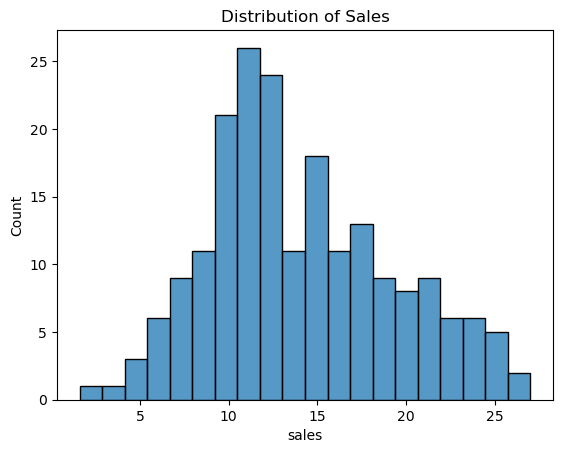

In [ ]:
# Check sales count using histplot
sns.histplot(data['sales'], bins=20)
plt.title('Distribution of Sales')
plt.show()

# Observation from histplot:- On an average 12-14 Thousands pieces are sold by company.

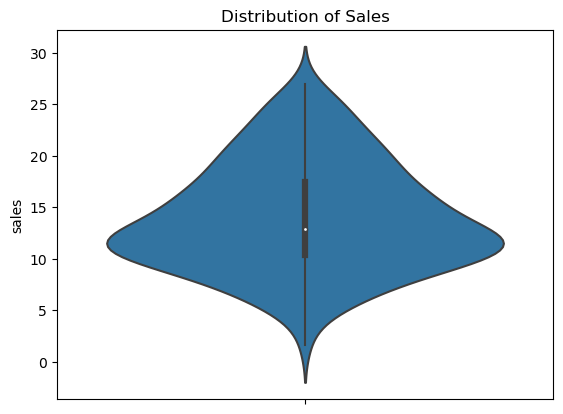

In [ ]:
# Check sales count using violinplot
sns.violinplot(y='sales', data=data)
plt.title('Distribution of Sales')
plt.show()

# Observation from Violinplot:- On an average 12-14 Thousands pieces are sold by company. And verifies the information from Histplot

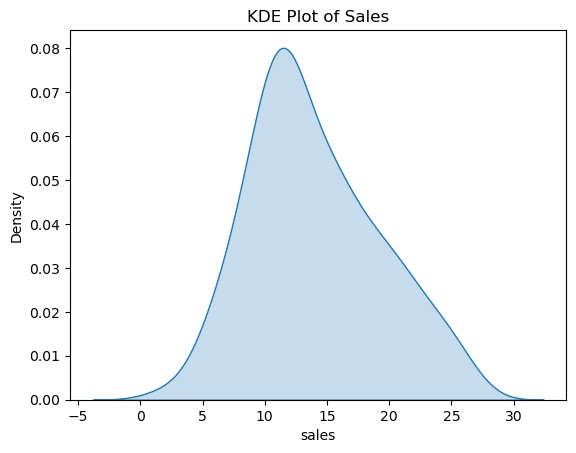

In [ ]:
# Check sales count using kdeplot
sns.kdeplot(data['sales'] , fill=True)
plt.title('KDE Plot of Sales')
plt.show()

# Observation from kdeplot:- On an average 12-14 Thousands pieces are sold by company. And some other relation count of sales.

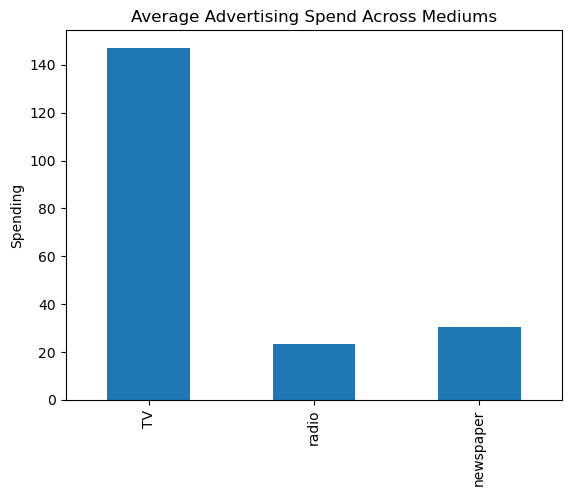

In [ ]:
# Check the average spending on each medium of advertisement
data.mean()[:-1].plot(kind='bar')
plt.title('Average Advertising Spend Across Mediums')
plt.ylabel('Spending')
plt.show()

# Observation from Bar Plot:- Mainly spending on Advertisement is through TV. Spending on Newspaper is more than Radio.

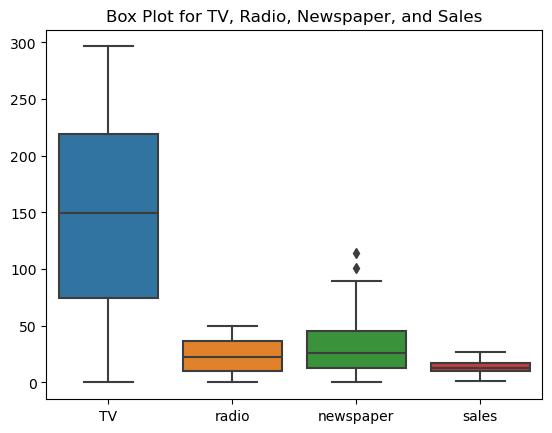

In [ ]:
# Check data by BoxPlot
sns.boxplot(data=data[['TV', 'radio', 'newspaper', 'sales']])
plt.title('Box Plot for TV, Radio, Newspaper, and Sales')
plt.show()

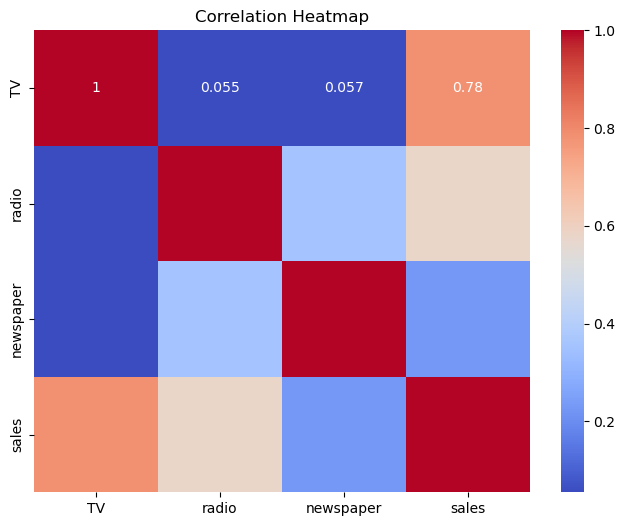

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Observations from correlation matrix
# - TV Advertisement shows the strongest relationship with Sales.
# - Radio and Newspaper advertisement also have moderate positive correlations with sales. But still Radio affects Sales more than Newspaper.

<Figure size 1200x800 with 0 Axes>

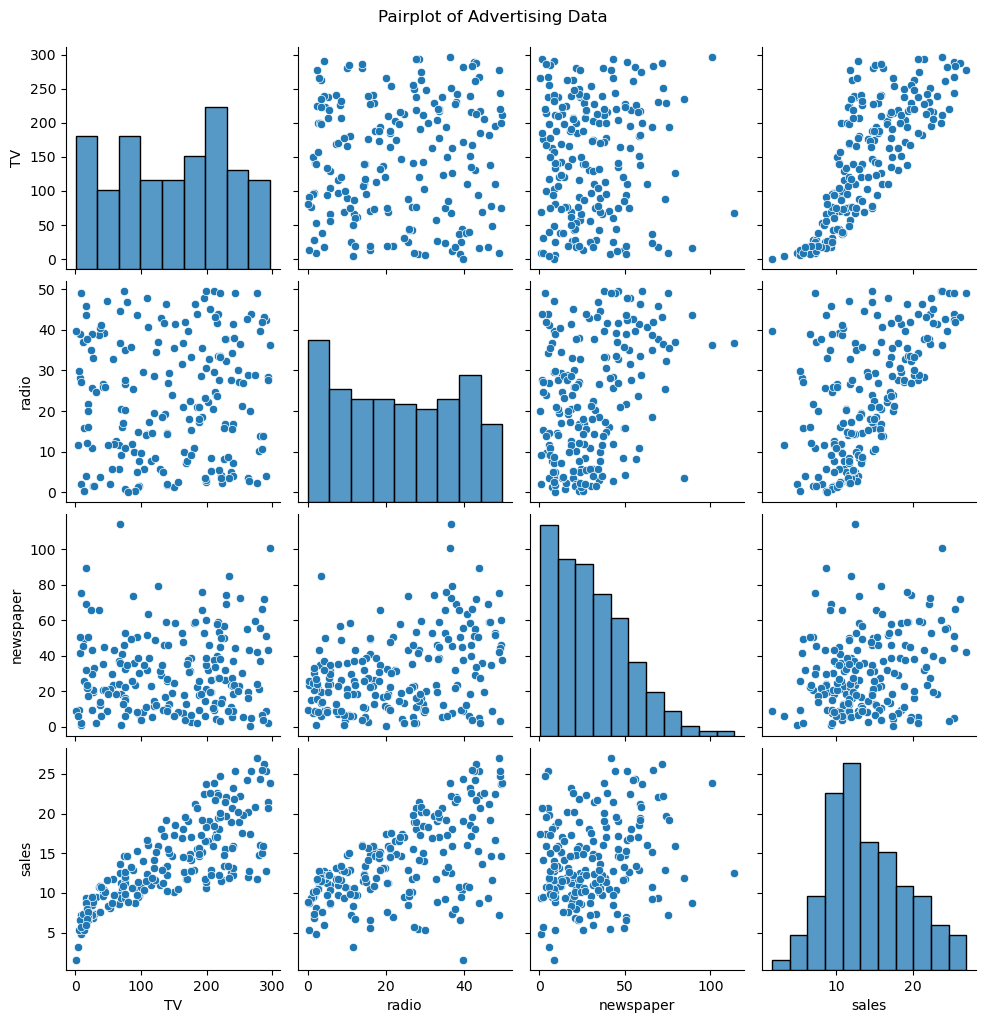

In [ ]:
# Visualize key relationships
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

## Observations from Pairplot
# - Sales increses initially very heavily but then steadly if we increase advertisement by TV.
# - By Radio, Sales increases for sure but there are some cases where radio doesn't affect the sales too.
# - If we give newspaper advertisement, it increases the sales a lot but spending more on newspaper doesn't affect the sales much.

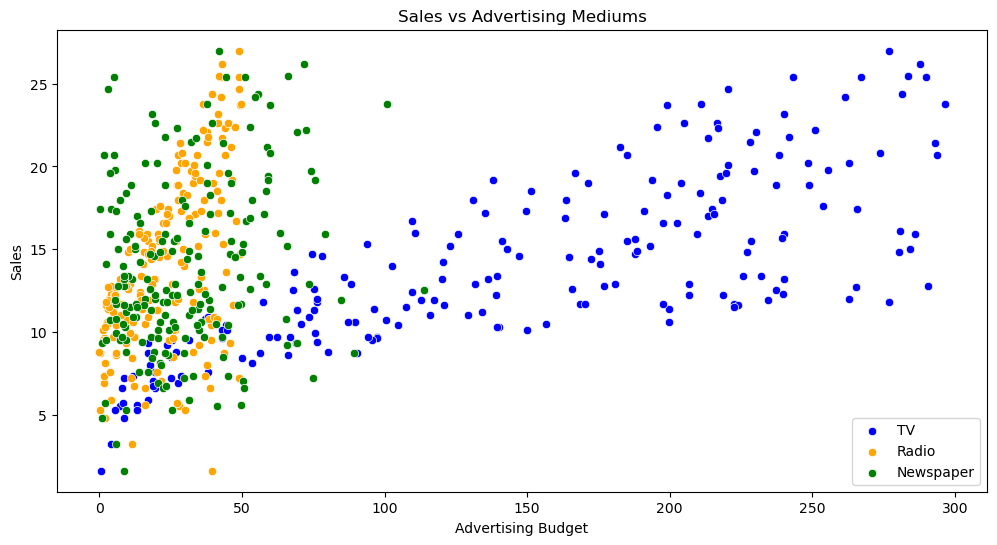

In [ ]:
# Visualize Sales vs Advertising Mediums
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='TV', y='sales', color='blue', label='TV')
sns.scatterplot(data=data, x='radio', y='sales', color='orange', label='Radio')
sns.scatterplot(data=data, x='newspaper', y='sales', color='green', label='Newspaper')
plt.title('Sales vs Advertising Mediums')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Observations
# - Sales seem to be positively correlated with TV and radio advertising.
# - Newspaper advertising has a weaker correlation with sales.

## **Conclusion**

### **Key Findings**
1. TV advertisement is the most influential factor in predicting Sales.  
2. Radio and Newspaper also impact sales different ways.  

---

### **Limitations**
1. The dataset lacks key predictors like Social Media, which could improve accuracy.  
2. Skewness in the `Newspaper and Radio` data may affect predictions.

---

### **Future Improvements**
1. Add features like Social Media and HardCopy(like banners,billboard) data to enhance the model.  
2. Explore advanced models like Neural Networks for better performance.

With these enhancements, the analysis can provide even more accurate and actionable insights.
